In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import utils

!nvidia-smi

Fri May 26 18:47:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Generate data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

In [3]:
(train_data, test_data), info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [4]:
train_data, test_data, info = utils.prep_data(train_data, test_data, info)
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Build and train_data the model

In [5]:
model = utils.build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        50        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        410       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        410       
                                                                 
 flatten (Flatten)           (None, 7840)              0         
                                                                 
 dense (Dense)               (None, 10)                78410     
                                                                 
Total params: 79,280
Trainable params: 79,280
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [7]:
history = model.fit(
    train_data, 
    epochs=utils.EPOCHS,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/7
1875/1875 [==============================] - 27s 7ms/step - loss: 0.1842 - sparse_categorical_accuracy: 0.9458 - val_loss: 0.0717 - val_sparse_categorical_accuracy: 0.9786
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0701 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.0601 - val_sparse_categorical_accuracy: 0.9802
Epoch 3/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9832 - val_loss: 0.0585 - val_sparse_categorical_accuracy: 0.9822
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0410 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9803
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0323 - sparse_categorical_accuracy: 0.9895 - val_loss: 0.0605 - val_sparse_categorical_accuracy: 0.9825
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0248 - sparse_cat

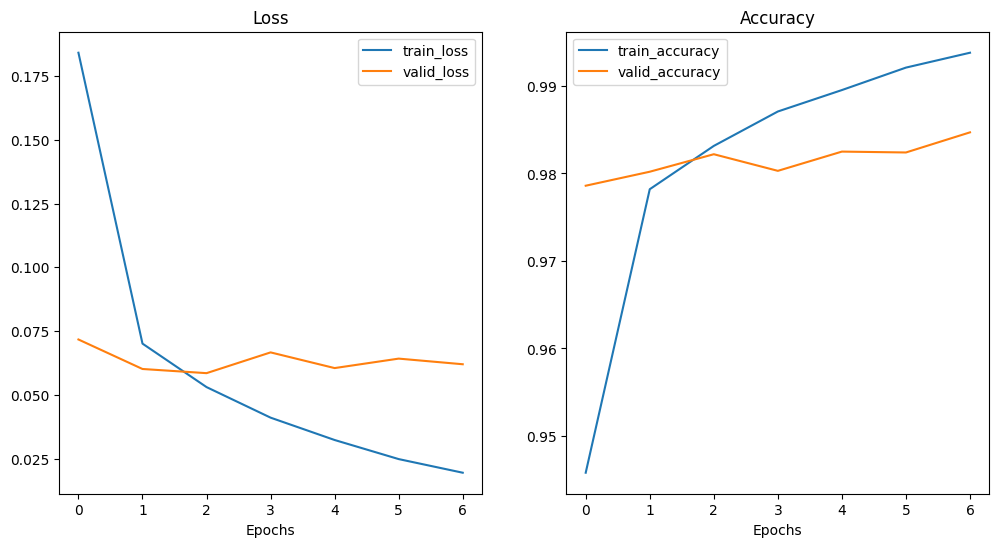

In [8]:
utils.plot_loss_curves(history)

In [9]:
model.evaluate(test_data)

313/313 [==============================] - 1s 2ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9847


[0.061993762850761414, 0.9847000241279602]

## Testing the model on custom data

In [10]:
custom_data, custom_labels = utils.get_zipped_data("custom_data.zip")
custom_data.shape, custom_labels.shape

((30, 28, 28, 1), (30,))

In [11]:
model.evaluate(custom_data, custom_labels)

1/1 [==============================] - 0s 99ms/step - loss: 11.5973 - sparse_categorical_accuracy: 0.3667


[11.597304344177246, 0.36666667461395264]